学习R语言主成分分析和因子分析。

In [3]:
install.packages("psych")

package 'psych' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\86151\AppData\Local\Temp\Rtmp4MfTHI\downloaded_packages


# 主成分分析

## 判断主成分的个数

Warning message in fa.stats(r = r, f = f, phi = phi, n.obs = n.obs, np.obs = np.obs, :
"The estimated weights for the factor scores are probably incorrect.  Try a different factor score estimation method."


Parallel analysis suggests that the number of factors =  NA  and the number of components =  1 


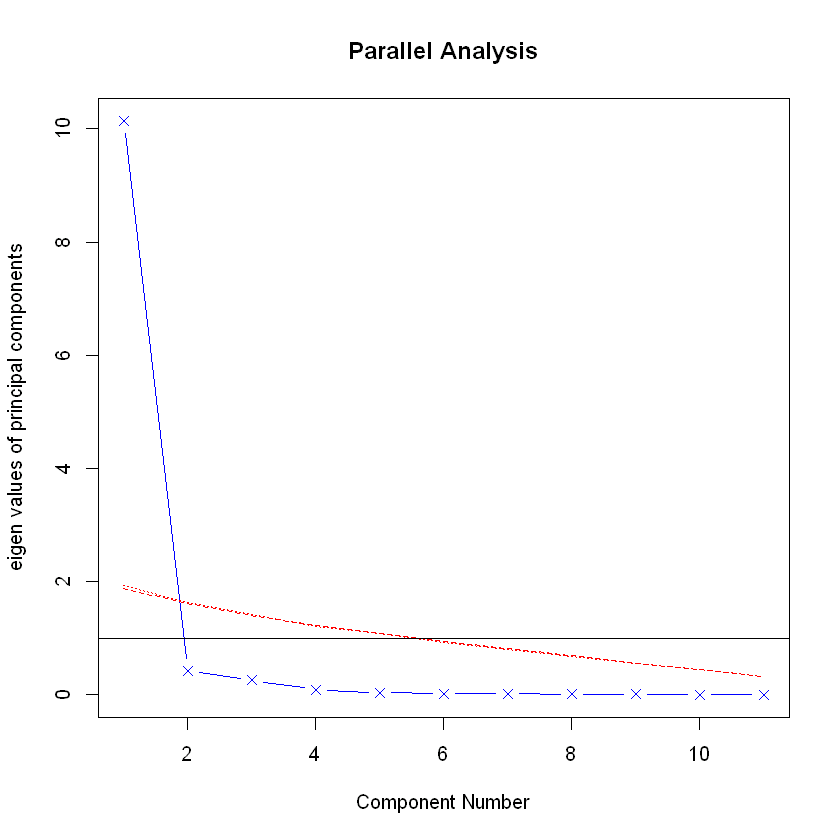

In [4]:
library(psych)

fa.parallel(
    USJudgeRatings[,-1],
    fa="pc",
    n.iter=100,
    show.legend=FALSE,
    main="Parallel Analysis",
)

## 提取主成分

In [5]:
library(psych)
pc <- principal(USJudgeRatings[,-1], nfactors=1)
pc

Principal Components Analysis
Call: principal(r = USJudgeRatings[, -1], nfactors = 1)
Standardized loadings (pattern matrix) based upon correlation matrix
      PC1   h2     u2 com
INTG 0.92 0.84 0.1565   1
DMNR 0.91 0.83 0.1663   1
DILG 0.97 0.94 0.0613   1
CFMG 0.96 0.93 0.0720   1
DECI 0.96 0.92 0.0763   1
PREP 0.98 0.97 0.0299   1
FAMI 0.98 0.95 0.0469   1
ORAL 1.00 0.99 0.0091   1
WRIT 0.99 0.98 0.0196   1
PHYS 0.89 0.80 0.2013   1
RTEN 0.99 0.97 0.0275   1

                 PC1
SS loadings    10.13
Proportion Var  0.92

Mean item complexity =  1
Test of the hypothesis that 1 component is sufficient.

The root mean square of the residuals (RMSR) is  0.04 
 with the empirical chi square  6.21  with prob <  1 

Fit based upon off diagonal values = 1

Parallel analysis suggests that the number of factors =  NA  and the number of components =  2 


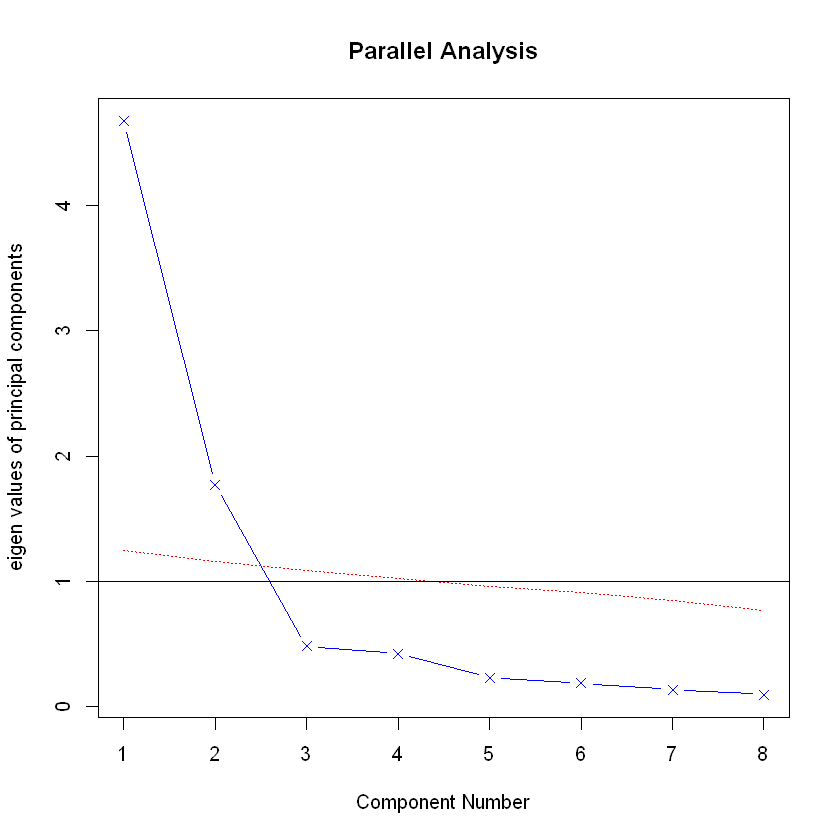

In [6]:
library(psych)
fa.parallel(
    Harman23.cor$cov,
    n.obs=302,
    fa="pc",
    n.iter=100,
    show.legend=FALSE,
    main="Parallel Analysis",
)

In [7]:
library(psych)
pc <- principal(Harman23.cor$cov, nfactors=2, rotate="none")
pc

Principal Components Analysis
Call: principal(r = Harman23.cor$cov, nfactors = 2, rotate = "none")
Standardized loadings (pattern matrix) based upon correlation matrix
                PC1   PC2   h2    u2 com
height         0.86 -0.37 0.88 0.123 1.4
arm.span       0.84 -0.44 0.90 0.097 1.5
forearm        0.81 -0.46 0.87 0.128 1.6
lower.leg      0.84 -0.40 0.86 0.139 1.4
weight         0.76  0.52 0.85 0.150 1.8
bitro.diameter 0.67  0.53 0.74 0.261 1.9
chest.girth    0.62  0.58 0.72 0.283 2.0
chest.width    0.67  0.42 0.62 0.375 1.7

                       PC1  PC2
SS loadings           4.67 1.77
Proportion Var        0.58 0.22
Cumulative Var        0.58 0.81
Proportion Explained  0.73 0.27
Cumulative Proportion 0.73 1.00

Mean item complexity =  1.7
Test of the hypothesis that 2 components are sufficient.

The root mean square of the residuals (RMSR) is  0.05 

Fit based upon off diagonal values = 0.99

## 主成分旋转

In [8]:
rc <- principal(Harman23.cor$cov, nfactors=2, rotate="varimax")
rc

Principal Components Analysis
Call: principal(r = Harman23.cor$cov, nfactors = 2, rotate = "varimax")
Standardized loadings (pattern matrix) based upon correlation matrix
                RC1  RC2   h2    u2 com
height         0.90 0.25 0.88 0.123 1.2
arm.span       0.93 0.19 0.90 0.097 1.1
forearm        0.92 0.16 0.87 0.128 1.1
lower.leg      0.90 0.22 0.86 0.139 1.1
weight         0.26 0.88 0.85 0.150 1.2
bitro.diameter 0.19 0.84 0.74 0.261 1.1
chest.girth    0.11 0.84 0.72 0.283 1.0
chest.width    0.26 0.75 0.62 0.375 1.2

                       RC1  RC2
SS loadings           3.52 2.92
Proportion Var        0.44 0.37
Cumulative Var        0.44 0.81
Proportion Explained  0.55 0.45
Cumulative Proportion 0.55 1.00

Mean item complexity =  1.1
Test of the hypothesis that 2 components are sufficient.

The root mean square of the residuals (RMSR) is  0.05 

Fit based upon off diagonal values = 0.99

## 获取主成分得分

In [9]:
library(psych)
pc <- principal(USJudgeRatings[,-1], nfactors=1, score=TRUE)
head(pc$scores)

,PC1
"AARONSON,L.H.",-0.1857981
"ALEXANDER,J.M.",0.7469865
"ARMENTANO,A.J.",0.0704772
"BERDON,R.I.",1.1358765
"BRACKEN,J.J.",-2.1586211
"BURNS,E.B.",0.7669406


In [10]:
cor(USJudgeRatings$CONT, pc$scores)

PC1
-0.008815895


In [12]:
library(psych)
rc <- principal(Harman23.cor$cov, nfactors=2, rotate="varimax", score=TRUE)
round(unclass(rc$weights), 2)

RC1,RC2
0.28,-0.05
0.30,-0.08
0.30,-0.09
0.28,-0.06
-0.06,0.33
-0.08,0.32
-0.10,0.34
-0.04,0.27


In [14]:
class(rc$weights)

[1] "matrix" "array"

# 探索性因子分析

In [19]:
ability.cov$cov

,general,picture,blocks,maze,reading,vocab
general,25,6.0,34,6.0,20.8,29.7
picture,6,6.7,18,1.8,4.9,7.2
blocks,34,18.1,150,19.4,31.4,50.8
maze,6,1.8,19,12.7,4.8,9.1
reading,21,4.9,31,4.8,52.6,66.8
vocab,30,7.2,51,9.1,66.8,135.3


In [21]:
class(ability.cov$cov)

[1] "matrix" "array"

In [20]:
options(digits=2)
covariances <- ability.cov$cov
correlations <- cov2cor(covariances)
correlations

,general,picture,blocks,maze,reading,vocab
general,1.00,0.47,0.55,0.34,0.58,0.51
picture,0.47,1.00,0.57,0.19,0.26,0.24
blocks,0.55,0.57,1.00,0.45,0.35,0.36
maze,0.34,0.19,0.45,1.00,0.18,0.22
reading,0.58,0.26,0.35,0.18,1.00,0.79
vocab,0.51,0.24,0.36,0.22,0.79,1.00


## 判断需提取的公共因子数

Warning message in fa.stats(r = r, f = f, phi = phi, n.obs = n.obs, np.obs = np.obs, :
"The estimated weights for the factor scores are probably incorrect.  Try a different factor score estimation method."
Warning message in fac(r = r, nfactors = nfactors, n.obs = n.obs, rotate = rotate, :
"An ultra-Heywood case was detected.  Examine the results carefully"
Warning message in fa.stats(r = r, f = f, phi = phi, n.obs = n.obs, np.obs = np.obs, :
"The estimated weights for the factor scores are probably incorrect.  Try a different factor score estimation method."
Warning message in fa.stats(r = r, f = f, phi = phi, n.obs = n.obs, np.obs = np.obs, :
"The estimated weights for the factor scores are probably incorrect.  Try a different factor score estimation method."
Warning message in fa.stats(r = r, f = f, phi = phi, n.obs = n.obs, np.obs = np.obs, :
"The estimated weights for the factor scores are probably incorrect.  Try a different factor score estimation method."
Warning message in fac

Parallel analysis suggests that the number of factors =  2  and the number of components =  1 


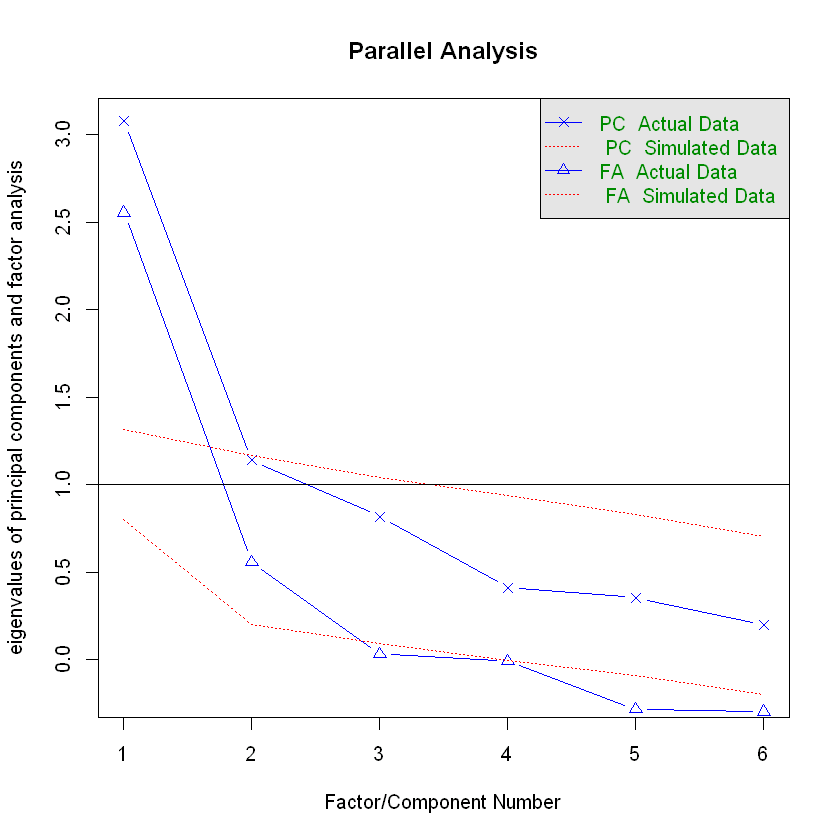

In [23]:
fa.parallel(correlations, n.obs=112, fa="both", n.iter=100, main="Parallel Analysis")

## 提取公共因子

In [25]:
fa <- fa(correlations, nfactors=2, rotate="none", fm="pa")
fa

Factor Analysis using method =  pa
Call: fa(r = correlations, nfactors = 2, rotate = "none", fm = "pa")
Standardized loadings (pattern matrix) based upon correlation matrix
         PA1   PA2   h2    u2 com
general 0.75  0.07 0.57 0.432 1.0
picture 0.52  0.32 0.38 0.623 1.7
blocks  0.75  0.52 0.83 0.166 1.8
maze    0.39  0.22 0.20 0.798 1.6
reading 0.81 -0.51 0.91 0.089 1.7
vocab   0.73 -0.39 0.69 0.313 1.5

                       PA1  PA2
SS loadings           2.75 0.83
Proportion Var        0.46 0.14
Cumulative Var        0.46 0.60
Proportion Explained  0.77 0.23
Cumulative Proportion 0.77 1.00

Mean item complexity =  1.5
Test of the hypothesis that 2 factors are sufficient.

df null model =  15  with the objective function =  2.5
df of  the model are 4  and the objective function was  0.07 

The root mean square of the residuals (RMSR) is  0.03 
The df corrected root mean square of the residuals is  0.06 

Fit based upon off diagonal values = 0.99
Measures of factor score adequacy 

## 因子旋转

In [26]:
fa.varimax <- fa(correlations, nfacotrs=2, rotate="varimax", fm="pa")
fa.varimax

Factor Analysis using method =  pa
Call: fa(r = correlations, rotate = "varimax", fm = "pa", nfacotrs = 2)
Standardized loadings (pattern matrix) based upon correlation matrix
         PA1   h2   u2 com
general 0.80 0.63 0.37   1
picture 0.53 0.28 0.72   1
blocks  0.68 0.47 0.53   1
maze    0.40 0.16 0.84   1
reading 0.73 0.53 0.47   1
vocab   0.70 0.49 0.51   1

                PA1
SS loadings    2.55
Proportion Var 0.43

Mean item complexity =  1
Test of the hypothesis that 1 factor is sufficient.

df null model =  15  with the objective function =  2.5
df of  the model are 9  and the objective function was  0.76 

The root mean square of the residuals (RMSR) is  0.13 
The df corrected root mean square of the residuals is  0.16 

Fit based upon off diagonal values = 0.92
Measures of factor score adequacy             
                                                   PA1
Correlation of (regression) scores with factors   0.92
Multiple R square of scores with factors          0.84
Mini

In [27]:
fa.promax <- fa(correlations, nfactors=2, rotate="promax", fm="pa")
fa.promax

Loading required namespace: GPArotation



Factor Analysis using method =  pa
Call: fa(r = correlations, nfactors = 2, rotate = "promax", fm = "pa")
Standardized loadings (pattern matrix) based upon correlation matrix
          PA1   PA2   h2    u2 com
general  0.37  0.48 0.57 0.432 1.9
picture -0.03  0.63 0.38 0.623 1.0
blocks  -0.10  0.97 0.83 0.166 1.0
maze     0.00  0.45 0.20 0.798 1.0
reading  1.00 -0.09 0.91 0.089 1.0
vocab    0.84 -0.01 0.69 0.313 1.0

                       PA1  PA2
SS loadings           1.83 1.75
Proportion Var        0.30 0.29
Cumulative Var        0.30 0.60
Proportion Explained  0.51 0.49
Cumulative Proportion 0.51 1.00

 With factor correlations of 
     PA1  PA2
PA1 1.00 0.55
PA2 0.55 1.00

Mean item complexity =  1.2
Test of the hypothesis that 2 factors are sufficient.

df null model =  15  with the objective function =  2.5
df of  the model are 4  and the objective function was  0.07 

The root mean square of the residuals (RMSR) is  0.03 
The df corrected root mean square of the residuals is  0

In [30]:
fsm <- function(oblique){
    if (class(oblique)[2]=="fa" & is.null(oblique$Phi)){
        warning("This is not an oblique rotation")
    } else {
        P <- unclass(oblique$loading)
        F <- P %*% oblique$Phi
        colnames(F) <- c("PA1", "PA2")
        return(F)
    }
}

In [31]:
fsm(fa.promax)

,PA1,PA2
general,0.64,0.69
picture,0.32,0.61
blocks,0.43,0.91
maze,0.25,0.45
reading,0.95,0.46
vocab,0.83,0.45


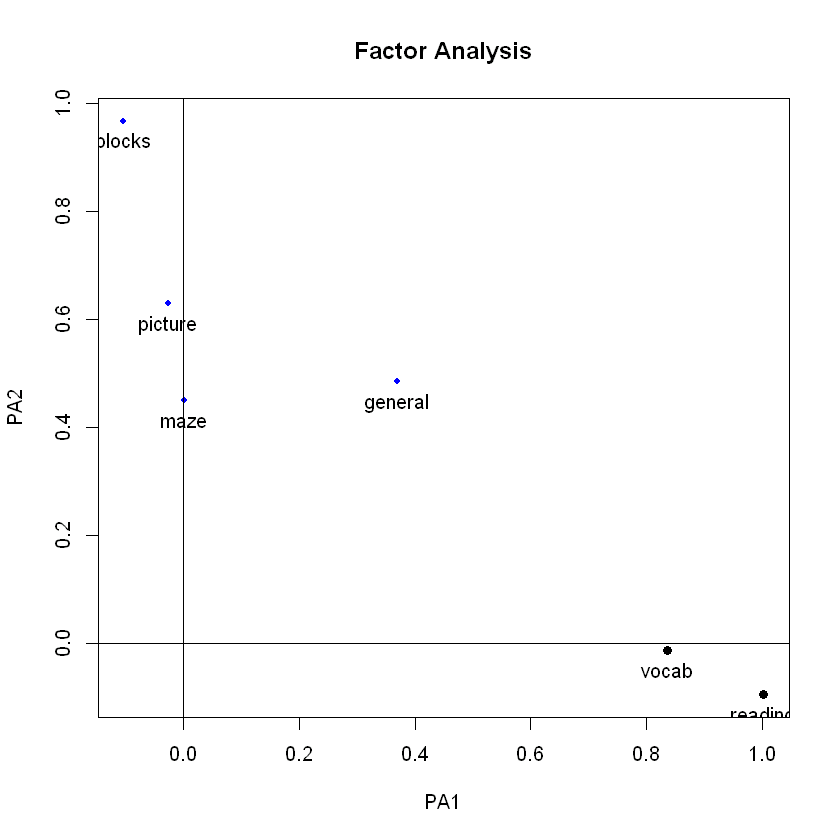

In [34]:
factor.plot(fa.promax, labels=rownames(fa.promax$loadings))

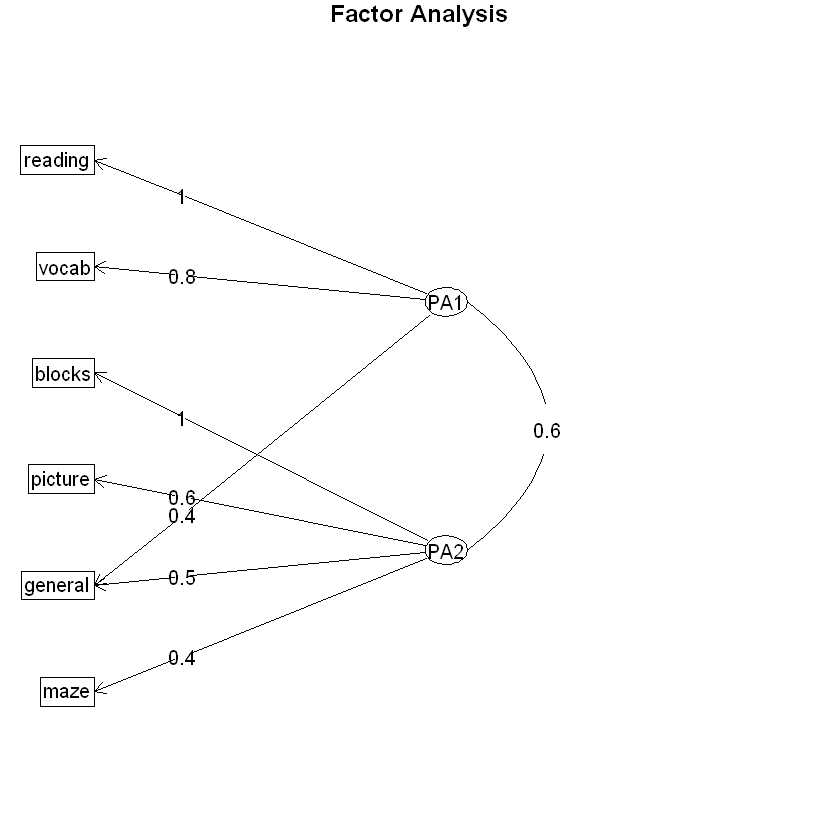

In [36]:
fa.diagram(fa.promax, simple=FALSE)

## 因子得分

In [37]:
fa.promax$weights

,PA1,PA2
general,0.078,0.211
picture,0.020,0.090
blocks,0.037,0.702
maze,0.027,0.035
reading,0.743,0.030
vocab,0.177,0.036
